## **Setup and Imports**




In [1]:
# Import necessary libraries
import pickle
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (7,4)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'seaborn'

## **Mount Google Drive and Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/My Drive/Colab Notebooks/EE 250 Lab 8')

from google.colab import files
files.upload()

[f for f in os.listdir() if 'coin' in f.lower()] # Just to check you have coins.csv and noisy_coins.csv in the right location!

Saving coins.csv to coins (1).csv
Saving noisy_coins.csv to noisy_coins (1).csv


['coins.csv', 'noisy_coins.csv', 'coins (1).csv', 'noisy_coins (1).csv']

## **Dataset Visualization**

In [4]:
# Load the dataset 'coins.csv' using pandas' read_csv function.
# Make sure coins.csv is in the directory where you're using Jupyter
# If using Google Colab, upload the coins file to the directory by usinf upload in the toolbar on the left
coins = pd.read_csv('coins.csv')
coins.tail(5)

,reflectance,weight,denomination
174,26.650728,5.420213,2
175,27.492055,6.149025,2
176,29.157397,7.035390,2
177,27.741846,5.032280,2
178,27.629866,5.395878,2


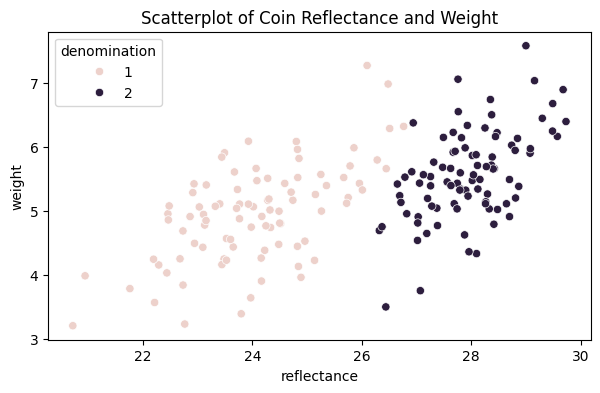

In [5]:
# Visualize the data distribution using a scatterplot
sns.scatterplot(x="reflectance", y="weight", data=coins, hue="denomination")
plt.title("Scatterplot of Coin Reflectance and Weight")
plt.show()

## **Data Preparation**

In [6]:
# [STUDENT SECTION: Prepare the data for training and testing]

# Prepare the input features (X)
X = coins[["reflectance", "weight"]].to_numpy()

# Convert the denomination values (1 and 2) to binary labels (0 and 1) for binary classification.
# Hint: Subtract 1 from the denomination values to convert them to 0 and 1.
y = coins[["denomination"]].to_numpy() - 1

# Split the data into training and testing sets using train_test_split.
# Use an 80/20 split for training and testing and random_state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Set the arguments

# Normalize the input test and train features using StandardScaler to standardize reflectance and weight values.
scaler = StandardScaler()
# Use the scaler's fit_transform and transform methods to standardize the training and testing features.
#  (See https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Build and Train the Model**

In [ ]:
# [STUDENT SECTION: Define and compile the model]
# Instantiate and Train the Model
# - Build a neural network model using TensorFlow/Keras.
# - The model should have:
#    - An input layer with 2 input features (reflectance and weight).
#    - 1 or 2 hidden layers with the number of neurons at your discretion (use 'relu' activation).
#      (Experiment to find the best accuracy)
#    - An output layer with 1 neuron and 'sigmoid' activation for binary classification.
model = Sequential()
model.add(Dense(8, input_shape=(2,), activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# - Compile the model using Adam optimizer with a learning rate of 0.001,
#   binary_crossentropy as the loss function, and 'accuracy' as the metric.
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#the above has nice accuracy


# - Train the model using X_train and y_train.
#    - Set validation_split to 0.2.
#    - Use EarlyStopping with patience=5 to prevent overfitting.
#    - Train the model for 100 epochs and use a batch size of 32.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# call the appropriate function to train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.1548 - loss: 0.9215 - val_accuracy: 0.1034 - val_loss: 0.9029
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1513 - loss: 0.8913 - val_accuracy: 0.1034 - val_loss: 0.8832
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1711 - loss: 0.8511 - val_accuracy: 0.1034 - val_loss: 0.8643
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1294 - loss: 0.8547 - val_accuracy: 0.1034 - val_loss: 0.8460
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1388 - loss: 0.8325 - val_accuracy: 0.1034 - val_loss: 0.8288
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1354 - loss: 0.8098 - val_accuracy: 0.1034 - val_loss: 0.8126
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1534 - loss: 0.7739 - val_accuracy: 0.1034 - val_loss: 0.7975
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1690 - loss: 0.7702 - val_accuracy: 0.1379 - val_loss: 0.7828
Epoc

## **Evaluate the Model**

**experiement with the accuracy if used only 1 middle layer vs. 2 and so on**

In [ ]:
# [STUDENT SECTION: Evaluate the model]
# Hint:
# - Call model.evaluate() on the test set (X_test, y_test) and print the test accuracy.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")
print(f"Loss: {loss}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9815 - loss: 0.1523
Accuracy: 0.9722222089767456
Loss: 0.15673436224460602


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


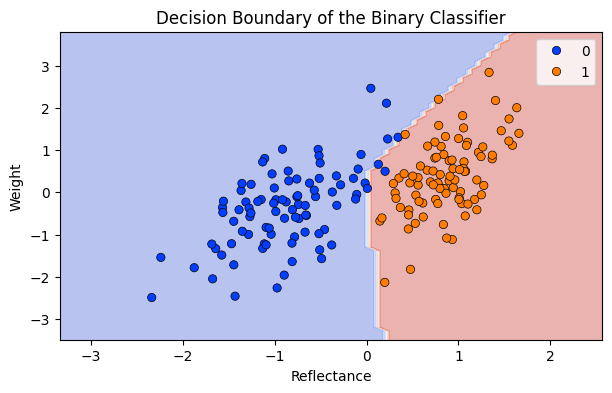

In [ ]:
# Plot the Decision Boundary:
# - Define a function to plot the decision boundary of the trained model. This function should take in the feature matrix X, the labels y, and the trained model.
# - This function should:
#    - Generate a mesh grid over the feature space (reflectance and weight).
#    - Use the model to predict labels for each point in the mesh grid.
#    - Plot the decision boundary using contourf.
#    - Overlay the training data points using seaborn's scatterplot.
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.round(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten(), palette='bright', edgecolor="k")
    plt.xlabel('Reflectance')
    plt.ylabel('Weight')
    plt.title('Decision Boundary of the Binary Classifier')
    plt.show()


# [STUDENT SECTION: Call the function to plot the decision boundary by passing the correct arguments]
plot_decision_boundary(scaler.transform(X), y, model)




In [8]:
# Save the Trained Model:
# - Save the trained model to a file named 'model.h5' using model.save().

# [STUDENT SECTION: Save the model]
model.save("model.h5")

# Load the Saved Model and Use it to evalue the "test" data:
# - Load the model using keras.models.load_model and re-evaluate it on the test data.
loaded_model = tf.keras.models.load_model("model.h5")
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9815 - loss: 0.1523 
Accuracy: 0.9722222089767456


In [9]:
# [STUDENT SECTION: Evaluate the loaded model on the test data]
# the accuracy of the loaded model on the test data.  Examine the output
# of predict and think about how to compute the accuracy of the predictions using
# the y_test data.  Hint:  You may need to round the predictions to 0 or 1 using np.round()
# When you use model.predict() in a binary classification problem, the output is usually
# a 2D array where each element is a list containing a single predicted probability
# (e.g., [[0.1], [0.9], [0.3], ...]). To compare these predictions to your 1D y_test array
# (e.g., [0, 1, 0, ...]), you need to "flatten()" the 2D array into a 1D array.
pred_y = loaded_model.predict(X_test).flatten().round()

# Print the accuracy of the loaded model on the test data

check_y = y_test.flatten()
accuracy = 0
for i in range(len(pred_y)):
  if pred_y[i] == check_y[i]:
    accuracy += 1
accuracy = accuracy / len(pred_y)

print(f"Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Accuracy: 0.9722222222222222


### **Eval on noisy data**

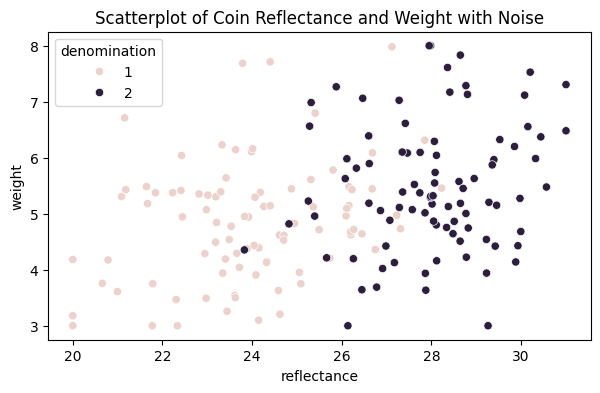

In [10]:

# In this section, you’ll test how well your trained model performs when the data isn't perfectly clean.
#  - The goal is to see whether your model can still correctly classify coins when there’s noise (for example, small measurement errors or variations in reflectance/weight).
noisy_coins = pd.read_csv('noisy_coins.csv')


# Visualize the data distribution using a scatterplot
sns.scatterplot(x="reflectance", y="weight", data=noisy_coins, hue="denomination")
plt.title("Scatterplot of Coin Reflectance and Weight with Noise")
plt.show()



In [16]:
#Prepare features and labels
# - Extract the same features as before: reflectance and weight.
# - Convert the denomination column (1/2) into binary labels (0/1).
# - IMPORTANT: Use the SAME StandardScaler (scaler) that you used for training.
#   This ensures both datasets are normalized in the same way.

X_noisy = noisy_coins[["reflectance", "weight"]].to_numpy()
y_noisy = noisy_coins[["denomination"]].to_numpy() - 1

X_noisy = scaler.transform(X_noisy)

#Predict and evaluate
# - The model will output probabilities between 0 and 1.
# - Convert these probabilities into binary predictions using a threshold of 0.5.

pred_noisy = loaded_model.predict(X_noisy).flatten().round()
print(len(pred_noisy))

check_noisy = y_noisy.flatten()
accuracy = 0
for i in range(len(pred_noisy)):
  if pred_noisy[i] == check_noisy[i]:
    accuracy += 1
accuracy = accuracy / len(pred_noisy)

print(f"Accuracy: {accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
179
Accuracy: 0.8100558659217877


In [13]:
# Generate and visualize confusion matrix
# - Add the needed libraries
# - The confusion matrix shows how many samples were correctly or incorrectly classified.
# - Rows correspond to TRUE labels; columns correspond to PREDICTED labels.
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

print("Original Data:\n")

conf_mat = confusion_matrix(check_y, pred_y)
print(f"Confusion Matrix:\n{conf_mat}\n")

# Print precision, recall, and F1-score

print( f"Precision: {precision_score(check_y, pred_y)} " )
print( f"Recall: {recall_score(check_y, pred_y)} " )
print( f"F1: {f1_score(check_y, pred_y)} " )


# Repeat for Noisy Data
print("\n\nNoisy Data:\n")

conf_mat_noisy = confusion_matrix(check_noisy, pred_noisy)
print(f"Confusion Matrix:\n{conf_mat_noisy}\n")

print( f"Precision: {precision_score(check_noisy, pred_noisy)} " )
print( f"Recall: {recall_score(check_noisy, pred_noisy)} " )
print( f"F1: {f1_score(check_noisy, pred_noisy)} " )


Original Data:

Confusion Matrix:
[[18  0]
 [ 1 17]]

Precision: 1.0 
Recall: 0.9444444444444444 
F1: 0.9714285714285714 


Noisy Data:

Confusion Matrix:
[[74 16]
 [18 71]]

Precision: 0.8160919540229885 
Recall: 0.797752808988764 
F1: 0.8068181818181818 
